In [1438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Starbucks Capstone (predict customer's next purchase time)

## Exploratory Data Analysis
We'll read in the starbucks_df and sb_customer dataframes, which we converted to CSVs in the Data Wrangling notebook.

In [1439]:
starbucks_df = pd.read_csv('starbucks_df.csv')

In [1440]:
starbucks_df.head()

,Unnamed: 0,person,value,time,gender,age,became_member_on,income
0,0,0009655768c64bdeb2e877511632db8f,22.16,228,M,33,2017-04-21,72000.0
1,1,0009655768c64bdeb2e877511632db8f,8.57,414,M,33,2017-04-21,72000.0
2,2,0009655768c64bdeb2e877511632db8f,14.11,528,M,33,2017-04-21,72000.0
3,3,0009655768c64bdeb2e877511632db8f,13.56,552,M,33,2017-04-21,72000.0
4,4,0009655768c64bdeb2e877511632db8f,10.27,576,M,33,2017-04-21,72000.0


In [1441]:
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122176 entries, 0 to 122175
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        122176 non-null  int64  
 1   person            122176 non-null  object 
 2   value             122176 non-null  float64
 3   time              122176 non-null  int64  
 4   gender            122176 non-null  object 
 5   age               122176 non-null  int64  
 6   became_member_on  122176 non-null  object 
 7   income            122176 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.5+ MB


Convert became_member_on column to datetime

In [1442]:
starbucks_df['became_member_on'] = pd.to_datetime(starbucks_df['became_member_on'])

In [1443]:
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122176 entries, 0 to 122175
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        122176 non-null  int64         
 1   person            122176 non-null  object        
 2   value             122176 non-null  float64       
 3   time              122176 non-null  int64         
 4   gender            122176 non-null  object        
 5   age               122176 non-null  int64         
 6   became_member_on  122176 non-null  datetime64[ns]
 7   income            122176 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 7.5+ MB


In [1444]:
starbucks_df['person'].nunique()

14288

Here we drop the value and time columns and create a dataframe with the demographic information of each customer, and then drop the duplicates.

In [1445]:
starbucks_demo = starbucks_df.drop(columns = ['value', 'time'])

In [1446]:
starbucks_demo.drop(columns = ['Unnamed: 0'], inplace = True)

In [1447]:
starbucks_demo = starbucks_demo.drop_duplicates()

In [1448]:
starbucks_demo.head()

,person,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,M,33,2017-04-21,72000.0
8,0020c2b971eb4e9188eac86d93036a77,F,59,2016-03-04,90000.0
16,0020ccbbb6d84e358d3414a3ff76cffd,F,24,2016-11-11,60000.0
28,003d66b6608740288d6cc97a6903f4f0,F,26,2017-06-21,73000.0
46,00426fe3ffde4c6b9cb9ad6d077a13ea,F,19,2016-08-09,65000.0


In [1449]:
len(starbucks_demo)

14288

In [1450]:
starbucks_demo['person'].nunique()

14288

In [1451]:
sb_customer = pd.read_csv('sb_customer.csv')

# Target variable
This is the dataframe we calculated where we subtract last purchase in the first 20 days from first purchase in the last 10 days of our time frame to come up with our target variable, next_purchase.

In [1452]:
sb_customer.head()

,Unnamed: 0,person,next_purchase
0,0,0009655768c64bdeb2e877511632db8f,114.0
1,1,0020c2b971eb4e9188eac86d93036a77,366.0
2,2,0020ccbbb6d84e358d3414a3ff76cffd,138.0
3,3,003d66b6608740288d6cc97a6903f4f0,12.0
4,4,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0


In [1453]:
sb_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13773 entries, 0 to 13772
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13773 non-null  int64  
 1   person         13773 non-null  object 
 2   next_purchase  13773 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 322.9+ KB


In [1454]:
sb_customer['person'].nunique()

13773

In [1455]:
starbucks_df.drop(columns = ['Unnamed: 0'], inplace = True)
sb_customer.drop(columns = ['Unnamed: 0'], inplace = True)

In [1456]:
sb_customer.head()

,person,next_purchase
0,0009655768c64bdeb2e877511632db8f,114.0
1,0020c2b971eb4e9188eac86d93036a77,366.0
2,0020ccbbb6d84e358d3414a3ff76cffd,138.0
3,003d66b6608740288d6cc97a6903f4f0,12.0
4,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0


In [1457]:
sb_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13773 entries, 0 to 13772
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person         13773 non-null  object 
 1   next_purchase  13773 non-null  float64
dtypes: float64(1), object(1)
memory usage: 215.3+ KB


# 13,773 customers
We see that each row of sb_customer represents a unique customer. The minimum of next purchase (in hours) is 6. The maximum is 679, which was our fill-in for the missing values. We see in the histogram that there's a steady decline as next_purchase gets higher, then the spike at 679.

In [1458]:
sb_customer.describe()

,next_purchase
count,13773.000000
mean,171.143251
std,160.244831
min,6.000000
25%,66.000000
50%,126.000000
75%,216.000000
max,679.000000


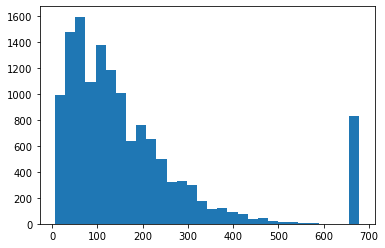

In [1459]:
plt.hist(sb_customer['next_purchase'], bins = 30);

We also need to bring in the dataframes we created when we divided our timeline into the first 20 days and the last 10 days.

In [1460]:
starbucks_20d = pd.read_csv('starbucks_20d.csv')

In [1461]:
starbucks_next = pd.read_csv('starbucks_next.csv')

In [1462]:
starbucks_20d.head()

,Unnamed: 0,person,value,time,gender,age,became_member_on,income
0,0,0009655768c64bdeb2e877511632db8f,22.16,228,M,33,2017-04-21,72000.0
1,1,0009655768c64bdeb2e877511632db8f,8.57,414,M,33,2017-04-21,72000.0
2,2,0020c2b971eb4e9188eac86d93036a77,17.63,54,F,59,2016-03-04,90000.0
3,3,0020c2b971eb4e9188eac86d93036a77,32.00,66,F,59,2016-03-04,90000.0
4,4,0020c2b971eb4e9188eac86d93036a77,24.39,72,F,59,2016-03-04,90000.0


In [1463]:
len(starbucks_20d)

76394

In [1464]:
starbucks_20d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76394 entries, 0 to 76393
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        76394 non-null  int64  
 1   person            76394 non-null  object 
 2   value             76394 non-null  float64
 3   time              76394 non-null  int64  
 4   gender            76394 non-null  object 
 5   age               76394 non-null  int64  
 6   became_member_on  76394 non-null  object 
 7   income            76394 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.7+ MB


In [1465]:
len(starbucks_next)

45782

In [1466]:
starbucks_next.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45782 entries, 0 to 45781
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        45782 non-null  int64  
 1   person            45782 non-null  object 
 2   value             45782 non-null  float64
 3   time              45782 non-null  int64  
 4   gender            45782 non-null  object 
 5   age               45782 non-null  int64  
 6   became_member_on  45782 non-null  object 
 7   income            45782 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.8+ MB


In [1467]:
starbucks_20d['became_member_on'] = pd.to_datetime(starbucks_20d['became_member_on'])
starbucks_next['became_member_on'] = pd.to_datetime(starbucks_next['became_member_on'])

In [1468]:
starbucks_20d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76394 entries, 0 to 76393
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        76394 non-null  int64         
 1   person            76394 non-null  object        
 2   value             76394 non-null  float64       
 3   time              76394 non-null  int64         
 4   gender            76394 non-null  object        
 5   age               76394 non-null  int64         
 6   became_member_on  76394 non-null  datetime64[ns]
 7   income            76394 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 4.7+ MB


In [1469]:
starbucks_20d.describe()

,Unnamed: 0,value,time,age,income
count,76394.000000,76394.000000,76394.000000,76394.000000,76394.000000
mean,38196.500000,13.828734,254.802236,52.639500,61862.345210
std,22053.192569,29.912715,140.494779,17.885834,20680.130616
min,0.000000,0.050000,0.000000,18.000000,30000.000000
25%,19098.250000,3.662500,132.000000,39.000000,46000.000000
50%,38196.500000,10.815000,258.000000,54.000000,60000.000000
75%,57294.750000,19.090000,384.000000,65.000000,74000.000000
max,76393.000000,1001.850000,474.000000,101.000000,120000.000000


In [1470]:
starbucks_next.describe()

,Unnamed: 0,value,time,age,income
count,45782.000000,45782.000000,45782.000000,45782.000000,45782.000000
mean,22890.500000,14.244758,592.584990,52.830719,61843.344546
std,13216.269349,34.789894,66.510097,17.994634,20692.922345
min,0.000000,0.050000,480.000000,18.000000,30000.000000
25%,11445.250000,3.560000,534.000000,39.000000,45000.000000
50%,22890.500000,10.640000,594.000000,54.000000,60000.000000
75%,34335.750000,19.180000,648.000000,66.000000,74000.000000
max,45781.000000,1062.280000,714.000000,101.000000,120000.000000


In [1471]:
starbucks_20d.drop(columns = ['Unnamed: 0'], inplace = True)
starbucks_next.drop(columns = ['Unnamed: 0'], inplace = True)

# Recency, Frequency and Monetary (RFM) values
Now we'll create variables that measure the time of the customer's most recent purchase (Recency), how often the customer purchases (Frequency) and the total value of all the customer's purchases (Revenue).

We start with recency. We group by customers and create a dataframe with each customer's maximum purchase time, which would be the most recent. Then we subtract everyone's max purchase time from the highest of all max purchase times, which is 474, to get Recency.

In [1472]:
sb_max_purchase = starbucks_20d.groupby('person').time.max().reset_index()
sb_max_purchase.columns = ['person','MaxPurchaseTime']

In [1473]:
sb_max_purchase.head()

,person,MaxPurchaseTime
0,0009655768c64bdeb2e877511632db8f,414
1,0020c2b971eb4e9188eac86d93036a77,144
2,0020ccbbb6d84e358d3414a3ff76cffd,462
3,003d66b6608740288d6cc97a6903f4f0,468
4,00426fe3ffde4c6b9cb9ad6d077a13ea,348


In [1474]:
sb_max_purchase['Recency'] = sb_max_purchase['MaxPurchaseTime'].max() - sb_max_purchase['MaxPurchaseTime']
sb_customer = pd.merge(sb_customer, sb_max_purchase[['person','Recency']], on='person')

In [1475]:
sb_customer.head()

,person,next_purchase,Recency
0,0009655768c64bdeb2e877511632db8f,114.0,60
1,0020c2b971eb4e9188eac86d93036a77,366.0,330
2,0020ccbbb6d84e358d3414a3ff76cffd,138.0,12
3,003d66b6608740288d6cc97a6903f4f0,12.0,6
4,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0,126


In [1476]:
sb_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13773 entries, 0 to 13772
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person         13773 non-null  object 
 1   next_purchase  13773 non-null  float64
 2   Recency        13773 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 430.4+ KB


In [1477]:
sb_customer.describe()

,next_purchase,Recency
count,13773.000000,13773.000000
mean,171.143251,71.093008
std,160.244831,77.485073
min,6.000000,0.000000
25%,66.000000,18.000000
50%,126.000000,42.000000
75%,216.000000,96.000000
max,679.000000,474.000000


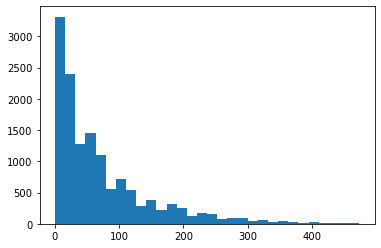

In [1478]:
plt.hist(sb_customer['Recency'], bins = 30);

# Segmentation
We use K-Means clustering to segment the customers into groups according to recency.

<ipython-input-1479-c7372e032a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_recency["clusters"] = kmeans.labels_
<ipython-input-1479-c7372e032a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_recency["clusters"] = kmeans.labels_
<ipython-input-1479-c7372e032a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

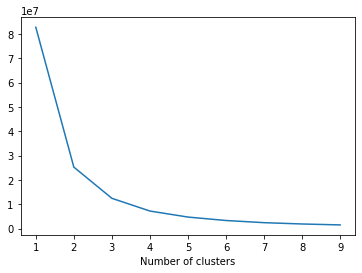

In [1479]:
from sklearn.cluster import KMeans

sse={}
sb_recency = sb_customer[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state = 42).fit(sb_recency)
    sb_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

# Ordering clusters
It looks like 4 is the optimal number of clusters. We'll use the function in Baris Karaman's 'Know Your Metrics' article in Towards Data Science https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b.<br>
This creates a column for the cluster number and the ascending argument allows us to order the clusters so that the higher number is better for each cluster.<br>

In [1480]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(sb_customer[['Recency']])
sb_customer['RecencyCluster'] = kmeans.predict(sb_customer[['Recency']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

sb_customer = order_cluster('RecencyCluster', 'Recency',sb_customer,False)

In [1481]:
sb_customer.head()

,person,next_purchase,Recency,RecencyCluster
0,0009655768c64bdeb2e877511632db8f,114.0,60,2
1,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0,126,2
2,004b041fbfe44859945daa2c7f79ee64,144.0,84,2
3,0056df74b63b4298809f0b375a304cf4,144.0,60,2
4,00715b6e55c3431cb56ff7307eb19675,162.0,102,2


In [1482]:
sb_customer.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,641.0,307.057722,54.284189,246.0,264.0,294.0,342.0,474.0
1,1798.0,175.575083,31.488003,132.0,150.0,174.0,198.0,240.0
2,3831.0,82.739233,21.926310,54.0,66.0,78.0,102.0,126.0
3,7503.0,19.949620,15.115731,0.0,6.0,18.0,30.0,48.0


# Frequency

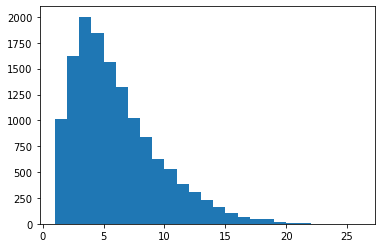

In [1483]:
sb_frequency = starbucks_20d.groupby('person').time.count().reset_index()
sb_frequency.columns = ['person','Frequency']

sb_customer = pd.merge(sb_customer, sb_frequency, on='person')

plt.hist(sb_customer['Frequency'], bins = 25);

In [1484]:
#k-means
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(sb_customer[['Frequency']])
sb_customer['FrequencyCluster'] = kmeans.predict(sb_customer[['Frequency']])

#order the frequency cluster
sb_customer = order_cluster('FrequencyCluster', 'Frequency',sb_customer,True)

#see details of each cluster
sb_customer.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,4643.0,2.212793,0.777450,1.0,2.0,2.0,3.0,3.0
1,4728.0,4.890863,0.811083,4.0,4.0,5.0,6.0,6.0
2,3017.0,8.216772,1.095601,7.0,7.0,8.0,9.0,10.0
3,1385.0,13.145126,2.280514,11.0,11.0,12.0,14.0,26.0


# Revenue

In [1485]:
starbucks_20d['Revenue'] = starbucks_20d['value']
sb_revenue = starbucks_20d.groupby('person').Revenue.sum().reset_index()

sb_customer = pd.merge(sb_customer, sb_revenue, on='person')



In [1486]:
sb_customer.head()

,person,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,0009655768c64bdeb2e877511632db8f,114.0,60,2,2,0,30.73
1,0056df74b63b4298809f0b375a304cf4,144.0,60,2,2,0,55.45
2,00b3c376db2a4115af3aef34a02f61d6,132.0,126,2,2,0,45.90
3,00bc42a62f884b41a13cc595856cf7c3,96.0,84,2,3,0,60.86
4,00bc983061d3471e8c8e74d31b7c8b6f,679.0,78,2,3,0,63.50


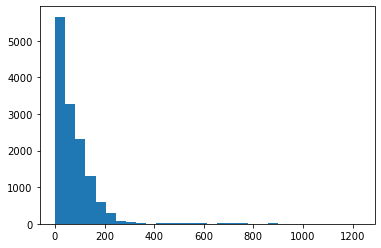

In [1487]:
#plot the histogram
plt.hist(sb_customer['Revenue'], bins = 30);

In [1488]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(sb_customer[['Revenue']])
sb_customer['RevenueCluster'] = kmeans.predict(sb_customer[['Revenue']])

sb_customer = order_cluster('RevenueCluster', 'Revenue',sb_customer,True)

sb_customer.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,7670.0,27.377722,17.988678,0.05,11.910,23.665,41.8000,64.55
1,4636.0,101.405899,24.455894,64.60,80.480,98.070,120.4850,153.54
2,1330.0,205.440406,56.745650,153.64,167.305,188.035,222.3525,477.92
3,137.0,752.494234,178.555723,479.87,606.850,716.180,894.7100,1226.79


# Overall score
Here we add each cluster number into an overall RFM score.

In [1489]:
sb_customer['OverallScore'] = sb_customer['RecencyCluster'] + sb_customer['FrequencyCluster'] + sb_customer['RevenueCluster']
sb_customer.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

<ipython-input-1489-4dedf202a6b6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sb_customer.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()


,Recency,Frequency,Revenue
OverallScore,,,
0,313.253385,1.669246,22.942534
1,186.517824,2.093809,26.396811
2,110.753071,2.676290,31.602279
3,62.923770,3.360246,38.743410
4,51.707178,5.049755,60.780322
5,32.185370,6.603600,86.472145
6,26.410345,9.681034,111.724580
7,22.023758,10.059395,196.995756
8,18.501348,12.571429,279.363935


# Segment scores
Customers with an overall score of 0-2 are labeled 'Low-Value.' Customers with a score between 3 and 6 are 'Mid-Value' and customers with a score of 7 or above are 'High-Value.'<br>

We're also going to make a dictionary of the value counts for each segment.

In [1490]:
sb_customer['Segment'] = 'Low-Value'
sb_customer.loc[sb_customer['OverallScore']>3,'Segment'] = 'Mid-Value' 
sb_customer.loc[sb_customer['OverallScore']>6,'Segment'] = 'High-Value'

In [1491]:
sb_customer.head(25)

,person,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,0009655768c64bdeb2e877511632db8f,114.0,60,2,2,0,30.73,0,2,Low-Value
1,0056df74b63b4298809f0b375a304cf4,144.0,60,2,2,0,55.45,0,2,Low-Value
2,00b3c376db2a4115af3aef34a02f61d6,132.0,126,2,2,0,45.90,0,2,Low-Value
3,00bc42a62f884b41a13cc595856cf7c3,96.0,84,2,3,0,60.86,0,2,Low-Value
4,00bc983061d3471e8c8e74d31b7c8b6f,679.0,78,2,3,0,63.50,0,2,Low-Value
5,00c32a104f0c4065b5b552895fb22e34,679.0,90,2,2,0,6.98,0,2,Low-Value
6,01176ee7289b48e39ee6261d5c071a07,228.0,84,2,3,0,16.02,0,2,Low-Value
7,015ef929e016415098eeae8ce59da721,258.0,102,2,1,0,7.72,0,2,Low-Value
8,01f33ff554d0443a9841adfd66d253f6,300.0,72,2,2,0,37.11,0,2,Low-Value
9,021c1940868647efbcb40ccdb942813b,258.0,108,2,3,0,53.70,0,2,Low-Value


In [1492]:
cust_segments1 = sb_customer['Segment'].value_counts().to_dict()

In [1493]:
cust_segments1

{'Mid-Value': 6803, 'Low-Value': 5651, 'High-Value': 1319}

# Scatterplots
We're going to take a sample of 1000 observations from our dataframe so that they'll be easier to see on a scatterplot.

In [1494]:
sb_cust_plot = sb_customer.sample(n = 1000)

In [1495]:
sb_cust_plot['Segment'].value_counts()

Mid-Value     482
Low-Value     420
High-Value     98
Name: Segment, dtype: int64

In [1496]:
sb_cust_plot.head()

,person,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
9424,da7906d43c2c4a7886761894ca7513cc,174.0,84,2,5,1,143.17,1,4,Mid-Value
13123,bb32df096aee4e32945119a6c541ee59,679.0,114,2,7,2,187.82,2,6,Mid-Value
602,7b00bec0eed84ed0b5ef5dd75cfe520f,114.0,84,2,2,0,50.17,0,2,Low-Value
5328,7afb4b47e3724959922eac347ac7b860,402.0,336,0,4,1,39.43,0,1,Low-Value
9490,f2acd6b2a94a48efbcd6437406eb67b9,679.0,108,2,5,1,116.42,1,4,Mid-Value


Function to create the scatterplots

In [1497]:
def make_plot(x_metric, y_metric):
    fig, ax = plt.subplots(figsize = (8,6))
    ax.scatter(sb_cust_plot[sb_cust_plot['Segment'] == 'High-Value'][x_metric], 
              sb_cust_plot[sb_cust_plot['Segment'] == 'High-Value'][y_metric], 
              color = 'black', label = 'High-Value', alpha = 0.5, s=25)
    ax.scatter(sb_cust_plot[sb_cust_plot['Segment'] == 'Mid-Value'][x_metric], 
              sb_cust_plot[sb_cust_plot['Segment'] == 'Mid-Value'][y_metric], 
              color = 'blue', label = 'Mid-Value', alpha = 0.5, s=25)
    ax.scatter(sb_cust_plot[sb_cust_plot['Segment'] == 'Low-Value'][x_metric], 
              sb_cust_plot[sb_cust_plot['Segment'] == 'Low-Value'][y_metric], 
              color = 'red', label = 'Low-Value', alpha = 0.5, s=25)
    ax.set_xlabel(x_metric)
    ax.set_ylabel(y_metric)
    ax.set_title(f'{x_metric} vs. {y_metric}')
    ax.legend()
    plt.show()

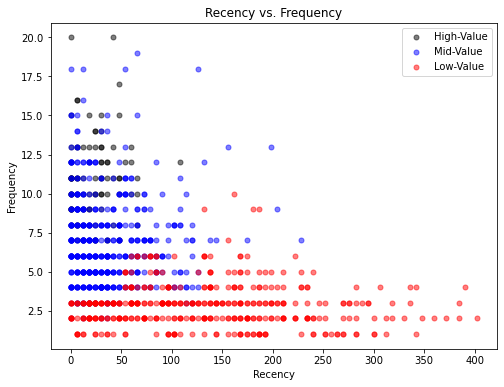

In [1498]:
make_plot('Recency', 'Frequency')

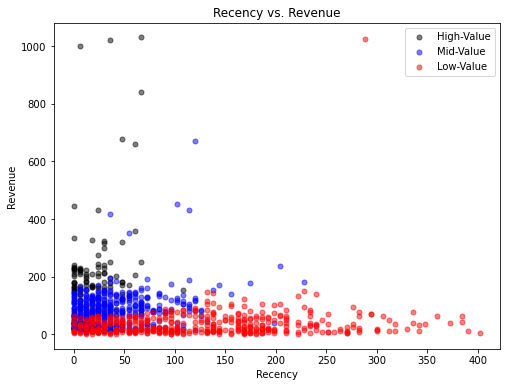

In [1499]:
make_plot('Recency', 'Revenue')

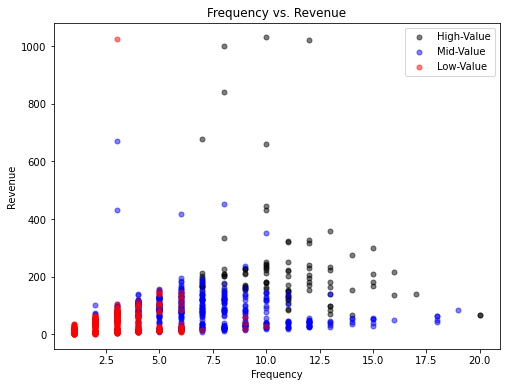

In [1500]:
make_plot('Frequency', 'Revenue')

# Plotting just the high-value customers
Let's take a closer look at our high-value customers. Since there are only 1,340 of them in our full dataframe, we don't need to sample.

In [1501]:
def plot_high_value(x_metric, y_metric):
    fig, ax = plt.subplots(figsize = (8,6))
    ax.scatter(sb_customer[sb_customer['Segment'] == 'High-Value'][x_metric], 
              sb_customer[sb_customer['Segment'] == 'High-Value'][y_metric], 
              color = 'green', label = 'High-Value', alpha = 0.5, s=25)
    ax.set_xlabel(x_metric)
    ax.set_ylabel(y_metric)
    ax.set_title(f'{x_metric} vs. {y_metric}')
    plt.show()

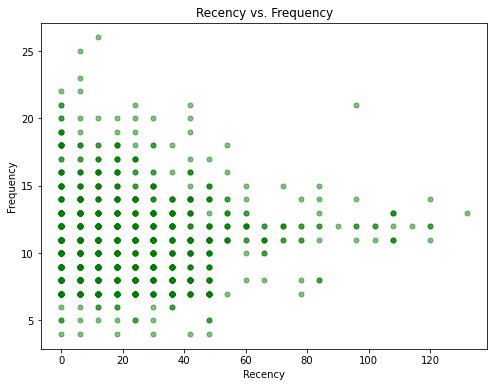

In [1502]:
plot_high_value('Recency', 'Frequency')

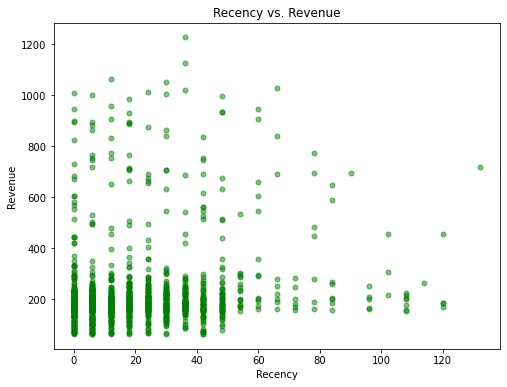

In [1503]:
plot_high_value('Recency', 'Revenue')

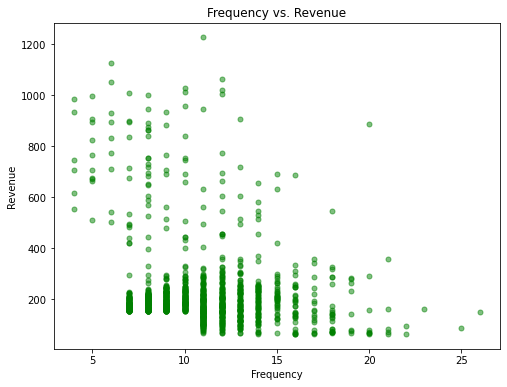

In [1504]:
plot_high_value('Frequency', 'Revenue')

# Low frequency doesn't always mean low value
It looks like frequency isn't the most indicative metric of high-value customers. Some of the highest revenue customers also are some of the lowest frequency customers. Those customers must spend a lot of money in a single visit.

# Adding columns that show previous orders
We want to get the mean and standard deviation of the time between orders. We start by creating columns that track each customer's last three purchases where applicable.

In [1505]:
sb_cust_order = starbucks_20d[['person', 'time']]

In [1506]:
sb_cust_order = sb_cust_order.sort_values(['person', 'time'])

In [1507]:
sb_cust_order.head(10)

,person,time
0,0009655768c64bdeb2e877511632db8f,228
1,0009655768c64bdeb2e877511632db8f,414
2,0020c2b971eb4e9188eac86d93036a77,54
3,0020c2b971eb4e9188eac86d93036a77,66
4,0020c2b971eb4e9188eac86d93036a77,72
5,0020c2b971eb4e9188eac86d93036a77,144
6,0020ccbbb6d84e358d3414a3ff76cffd,42
7,0020ccbbb6d84e358d3414a3ff76cffd,222
8,0020ccbbb6d84e358d3414a3ff76cffd,240
9,0020ccbbb6d84e358d3414a3ff76cffd,276


In [1508]:
sb_cust_order['PrevOrder'] = sb_cust_order.groupby('person')['time'].shift(1)
sb_cust_order['T2PrevOrder'] = sb_cust_order.groupby('person')['time'].shift(2)
sb_cust_order['T3PrevOrder'] = sb_cust_order.groupby('person')['time'].shift(3)

In [1509]:
sb_cust_order.head(10)

,person,time,PrevOrder,T2PrevOrder,T3PrevOrder
0,0009655768c64bdeb2e877511632db8f,228,NaN,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,414,228.0,NaN,NaN
2,0020c2b971eb4e9188eac86d93036a77,54,NaN,NaN,NaN
3,0020c2b971eb4e9188eac86d93036a77,66,54.0,NaN,NaN
4,0020c2b971eb4e9188eac86d93036a77,72,66.0,54.0,NaN
5,0020c2b971eb4e9188eac86d93036a77,144,72.0,66.0,54.0
6,0020ccbbb6d84e358d3414a3ff76cffd,42,NaN,NaN,NaN
7,0020ccbbb6d84e358d3414a3ff76cffd,222,42.0,NaN,NaN
8,0020ccbbb6d84e358d3414a3ff76cffd,240,222.0,42.0,NaN
9,0020ccbbb6d84e358d3414a3ff76cffd,276,240.0,222.0,42.0


In [1510]:
sb_cust_order['TimeDiff'] = (sb_cust_order['time'] - sb_cust_order['PrevOrder'])
sb_cust_order['TimeDiff2'] = (sb_cust_order['time'] - sb_cust_order['T2PrevOrder'])
sb_cust_order['TimeDiff3'] = (sb_cust_order['time'] - sb_cust_order['T3PrevOrder'])

In [1511]:
sb_cust_order.head(10)

,person,time,PrevOrder,T2PrevOrder,T3PrevOrder,TimeDiff,TimeDiff2,TimeDiff3
0,0009655768c64bdeb2e877511632db8f,228,NaN,NaN,NaN,NaN,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,414,228.0,NaN,NaN,186.0,NaN,NaN
2,0020c2b971eb4e9188eac86d93036a77,54,NaN,NaN,NaN,NaN,NaN,NaN
3,0020c2b971eb4e9188eac86d93036a77,66,54.0,NaN,NaN,12.0,NaN,NaN
4,0020c2b971eb4e9188eac86d93036a77,72,66.0,54.0,NaN,6.0,18.0,NaN
5,0020c2b971eb4e9188eac86d93036a77,144,72.0,66.0,54.0,72.0,78.0,90.0
6,0020ccbbb6d84e358d3414a3ff76cffd,42,NaN,NaN,NaN,NaN,NaN,NaN
7,0020ccbbb6d84e358d3414a3ff76cffd,222,42.0,NaN,NaN,180.0,NaN,NaN
8,0020ccbbb6d84e358d3414a3ff76cffd,240,222.0,42.0,NaN,18.0,198.0,NaN
9,0020ccbbb6d84e358d3414a3ff76cffd,276,240.0,222.0,42.0,36.0,54.0,234.0


In [1512]:
sb_cust_diff = sb_cust_order.groupby('person').agg({'TimeDiff': ['mean','std']}).reset_index()
sb_cust_diff.columns = ['person', 'TimeDiffMean','TimeDiffStd']

In [1513]:
sb_cust_diff.head(10)

,person,TimeDiffMean,TimeDiffStd
0,0009655768c64bdeb2e877511632db8f,186.000000,NaN
1,0020c2b971eb4e9188eac86d93036a77,30.000000,36.496575
2,0020ccbbb6d84e358d3414a3ff76cffd,46.666667,54.644304
3,003d66b6608740288d6cc97a6903f4f0,40.200000,46.047801
4,00426fe3ffde4c6b9cb9ad6d077a13ea,26.000000,23.073007
5,004b041fbfe44859945daa2c7f79ee64,124.000000,168.249814
6,004c5799adbf42868b9cff0396190900,38.000000,26.199237
7,005500a7188546ff8a767329a2f7c76a,60.000000,NaN
8,0056df74b63b4298809f0b375a304cf4,282.000000,NaN
9,00715b6e55c3431cb56ff7307eb19675,32.727273,24.499351


# Filtering out customers with less than three purchases
The mean and standard deviations of the time between purchases are really only useful for customers with at least three purchases. 

In [1514]:
sb_cust_order['person'].nunique()

13773

In [1515]:
sb_cust_order_last = sb_cust_order.drop_duplicates(subset=['person'],keep='last')

In [1516]:
sb_cust_order_last = sb_cust_order_last.dropna()

In [1517]:
sb_cust_order_last.head(10)

,person,time,PrevOrder,T2PrevOrder,T3PrevOrder,TimeDiff,TimeDiff2,TimeDiff3
5,0020c2b971eb4e9188eac86d93036a77,144,72.0,66.0,54.0,72.0,78.0,90.0
15,0020ccbbb6d84e358d3414a3ff76cffd,462,450.0,432.0,426.0,12.0,30.0,36.0
26,003d66b6608740288d6cc97a6903f4f0,468,450.0,432.0,402.0,18.0,36.0,66.0
39,00426fe3ffde4c6b9cb9ad6d077a13ea,348,336.0,270.0,258.0,12.0,78.0,90.0
43,004b041fbfe44859945daa2c7f79ee64,390,354.0,336.0,18.0,36.0,54.0,372.0
50,004c5799adbf42868b9cff0396190900,450,432.0,366.0,336.0,18.0,84.0,114.0
66,00715b6e55c3431cb56ff7307eb19675,372,360.0,342.0,330.0,12.0,30.0,42.0
71,0082fd87c18f45f2be70dbcbb0fb8aad,450,366.0,324.0,252.0,84.0,126.0,198.0
80,00840a2ca5d2408e982d56544dc14ffd,414,366.0,342.0,294.0,48.0,72.0,120.0
89,008d7088107b468893889da0ede0df5c,450,432.0,228.0,192.0,18.0,222.0,258.0


In [1518]:
len(sb_cust_order_last)

9130

In [1519]:
sb_cust_order_last = pd.merge(sb_cust_order_last, sb_cust_diff, on='person')

In [1520]:
sb_cust_order_last.head(10)

,person,time,PrevOrder,T2PrevOrder,T3PrevOrder,TimeDiff,TimeDiff2,TimeDiff3,TimeDiffMean,TimeDiffStd
0,0020c2b971eb4e9188eac86d93036a77,144,72.0,66.0,54.0,72.0,78.0,90.0,30.000000,36.496575
1,0020ccbbb6d84e358d3414a3ff76cffd,462,450.0,432.0,426.0,12.0,30.0,36.0,46.666667,54.644304
2,003d66b6608740288d6cc97a6903f4f0,468,450.0,432.0,402.0,18.0,36.0,66.0,40.200000,46.047801
3,00426fe3ffde4c6b9cb9ad6d077a13ea,348,336.0,270.0,258.0,12.0,78.0,90.0,26.000000,23.073007
4,004b041fbfe44859945daa2c7f79ee64,390,354.0,336.0,18.0,36.0,54.0,372.0,124.000000,168.249814
5,004c5799adbf42868b9cff0396190900,450,432.0,366.0,336.0,18.0,84.0,114.0,38.000000,26.199237
6,00715b6e55c3431cb56ff7307eb19675,372,360.0,342.0,330.0,12.0,30.0,42.0,32.727273,24.499351
7,0082fd87c18f45f2be70dbcbb0fb8aad,450,366.0,324.0,252.0,84.0,126.0,198.0,94.500000,59.674115
8,00840a2ca5d2408e982d56544dc14ffd,414,366.0,342.0,294.0,48.0,72.0,120.0,35.250000,17.982134
9,008d7088107b468893889da0ede0df5c,450,432.0,228.0,192.0,18.0,222.0,258.0,57.000000,74.337070


In [1521]:
sb_customer = pd.merge(sb_customer, sb_cust_order_last[['person','TimeDiff','TimeDiff2','TimeDiff3','TimeDiffMean','TimeDiffStd']], on='person')

In [1522]:
sb_customer.head(10)

,person,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,TimeDiff,TimeDiff2,TimeDiff3,TimeDiffMean,TimeDiffStd
0,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0,126,2,13,3,60.67,0,5,Mid-Value,12.0,78.0,90.0,26.000000,23.073007
1,04189492f0aa46f2b6fefe34ffbc7062,108.0,66,2,12,3,45.07,0,5,Mid-Value,24.0,30.0,60.0,21.818182,16.815577
2,093f0c09cc7242228edbb0e52ca14af6,78.0,72,2,14,3,33.82,0,5,Mid-Value,12.0,18.0,24.0,30.923077,28.863072
3,0b6c775f84a8435a9083900e1cb43ec9,90.0,72,2,15,3,39.69,0,5,Mid-Value,18.0,36.0,42.0,25.714286,21.105699
4,1280b4c8aa2a47dbbc1a7c79d0c9484d,102.0,72,2,11,3,49.97,0,5,Mid-Value,24.0,42.0,54.0,39.000000,40.024992
5,1486070ef4014e37bccc2522646991fa,204.0,54,2,15,3,61.50,0,5,Mid-Value,96.0,150.0,156.0,29.571429,26.880689
6,15f68a59b74546f892bd9f277c9a42ae,90.0,60,2,17,3,37.69,0,5,Mid-Value,24.0,36.0,132.0,24.000000,21.577766
7,1a297cc7262d42b59fb3e34fe0166702,78.0,54,2,12,3,42.20,0,5,Mid-Value,132.0,180.0,192.0,36.000000,46.164922
8,1b3ed8f0be194fe29ec3003832c2de1f,132.0,78,2,11,3,50.01,0,5,Mid-Value,36.0,48.0,54.0,33.000000,26.419690
9,1d755c218f714559a57ee7df7e6b1ca0,66.0,60,2,15,3,50.40,0,5,Mid-Value,6.0,18.0,42.0,28.714286,29.221774


In [1523]:
len(sb_customer)

9130

# We didn't lose a single high-value customer
Remember when we made the value counts dictionary? Here's another one that shows the value counts after filtering out the customers with less than two transactions.

In [1524]:
cust_segments2 = sb_customer['Segment'].value_counts().to_dict()

In [1525]:
cust_segments1, cust_segments2

({'Mid-Value': 6803, 'Low-Value': 5651, 'High-Value': 1319},
 {'Mid-Value': 6518, 'High-Value': 1319, 'Low-Value': 1293})

In [1526]:
print(f"We lost {6803-6518} Mid-Value customers and {5651-1293} Low-Value customers.")

We lost 285 Mid-Value customers and 4358 Low-Value customers.


# Encoding catergorical variables
Here we merge in those demographic variables so that we can one-hot encode gender and Segment.

In [1527]:
sb_customer = pd.merge(sb_customer, starbucks_demo, how = 'inner', on='person')

In [1528]:
sb_customer.head(10)

,person,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,TimeDiff,TimeDiff2,TimeDiff3,TimeDiffMean,TimeDiffStd,gender,age,became_member_on,income
0,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0,126,2,13,3,60.67,0,5,Mid-Value,12.0,78.0,90.0,26.000000,23.073007,F,19,2016-08-09,65000.0
1,04189492f0aa46f2b6fefe34ffbc7062,108.0,66,2,12,3,45.07,0,5,Mid-Value,24.0,30.0,60.0,21.818182,16.815577,M,29,2013-12-14,64000.0
2,093f0c09cc7242228edbb0e52ca14af6,78.0,72,2,14,3,33.82,0,5,Mid-Value,12.0,18.0,24.0,30.923077,28.863072,M,36,2017-06-17,35000.0
3,0b6c775f84a8435a9083900e1cb43ec9,90.0,72,2,15,3,39.69,0,5,Mid-Value,18.0,36.0,42.0,25.714286,21.105699,M,27,2017-11-09,35000.0
4,1280b4c8aa2a47dbbc1a7c79d0c9484d,102.0,72,2,11,3,49.97,0,5,Mid-Value,24.0,42.0,54.0,39.000000,40.024992,M,48,2014-05-22,42000.0
5,1486070ef4014e37bccc2522646991fa,204.0,54,2,15,3,61.50,0,5,Mid-Value,96.0,150.0,156.0,29.571429,26.880689,M,37,2014-03-08,39000.0
6,15f68a59b74546f892bd9f277c9a42ae,90.0,60,2,17,3,37.69,0,5,Mid-Value,24.0,36.0,132.0,24.000000,21.577766,M,54,2015-12-08,33000.0
7,1a297cc7262d42b59fb3e34fe0166702,78.0,54,2,12,3,42.20,0,5,Mid-Value,132.0,180.0,192.0,36.000000,46.164922,M,51,2014-06-24,33000.0
8,1b3ed8f0be194fe29ec3003832c2de1f,132.0,78,2,11,3,50.01,0,5,Mid-Value,36.0,48.0,54.0,33.000000,26.419690,M,66,2013-11-02,51000.0
9,1d755c218f714559a57ee7df7e6b1ca0,66.0,60,2,15,3,50.40,0,5,Mid-Value,6.0,18.0,42.0,28.714286,29.221774,M,20,2016-01-10,62000.0


In [1529]:
sb_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9130 entries, 0 to 9129
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   person            9130 non-null   object        
 1   next_purchase     9130 non-null   float64       
 2   Recency           9130 non-null   int64         
 3   RecencyCluster    9130 non-null   int64         
 4   Frequency         9130 non-null   int64         
 5   FrequencyCluster  9130 non-null   int64         
 6   Revenue           9130 non-null   float64       
 7   RevenueCluster    9130 non-null   int64         
 8   OverallScore      9130 non-null   int64         
 9   Segment           9130 non-null   object        
 10  TimeDiff          9130 non-null   float64       
 11  TimeDiff2         9130 non-null   float64       
 12  TimeDiff3         9130 non-null   float64       
 13  TimeDiffMean      9130 non-null   float64       
 14  TimeDiffStd       9130 n

In [1530]:
sb_class = sb_customer.copy()
sb_class = pd.get_dummies(sb_class, columns = ['gender', 'Segment'])

In [1531]:
sb_class['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

# Length of app membership
We'll convert the became_member_on column to member_time, which will be the number of days before the max became_member_on date.

In [1532]:
sb_class.rename(columns = {'became_member_on': 'member_time'}, inplace = True)

In [1533]:
sb_class['member_time'] = (sb_class['member_time'].max() - sb_class['member_time']).dt.days

In [1534]:
sb_class.head()

,person,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,TimeDiff,...,TimeDiffMean,TimeDiffStd,age,member_time,income,gender_F,gender_M,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0,126,2,13,3,60.67,0,5,12.0,...,26.000000,23.073007,19,716,65000.0,1,0,0,0,1
1,04189492f0aa46f2b6fefe34ffbc7062,108.0,66,2,12,3,45.07,0,5,24.0,...,21.818182,16.815577,29,1685,64000.0,0,1,0,0,1
2,093f0c09cc7242228edbb0e52ca14af6,78.0,72,2,14,3,33.82,0,5,12.0,...,30.923077,28.863072,36,404,35000.0,0,1,0,0,1
3,0b6c775f84a8435a9083900e1cb43ec9,90.0,72,2,15,3,39.69,0,5,18.0,...,25.714286,21.105699,27,259,35000.0,0,1,0,0,1
4,1280b4c8aa2a47dbbc1a7c79d0c9484d,102.0,72,2,11,3,49.97,0,5,24.0,...,39.000000,40.024992,48,1526,42000.0,0,1,0,0,1


# Classification of target variable
It looks like the median of next purchase time is 96 hours, which is exactly four days. The 25th percentile is 54. So the cutoff for the top category will be 48 hours, or two days, and the cutoff for the middle category will be 96 hours.

In [1535]:
sb_class.next_purchase.describe()

count    9130.000000
mean      132.770865
std       134.028118
min         6.000000
25%        54.000000
50%        96.000000
75%       162.000000
max       679.000000
Name: next_purchase, dtype: float64

In [1536]:
sb_class['next_purchase_range'] = 2
sb_class.loc[sb_class.next_purchase>48,'next_purchase_range'] = 1
sb_class.loc[sb_class.next_purchase>96,'next_purchase_range'] = 0

# Heatmap

<AxesSubplot:>

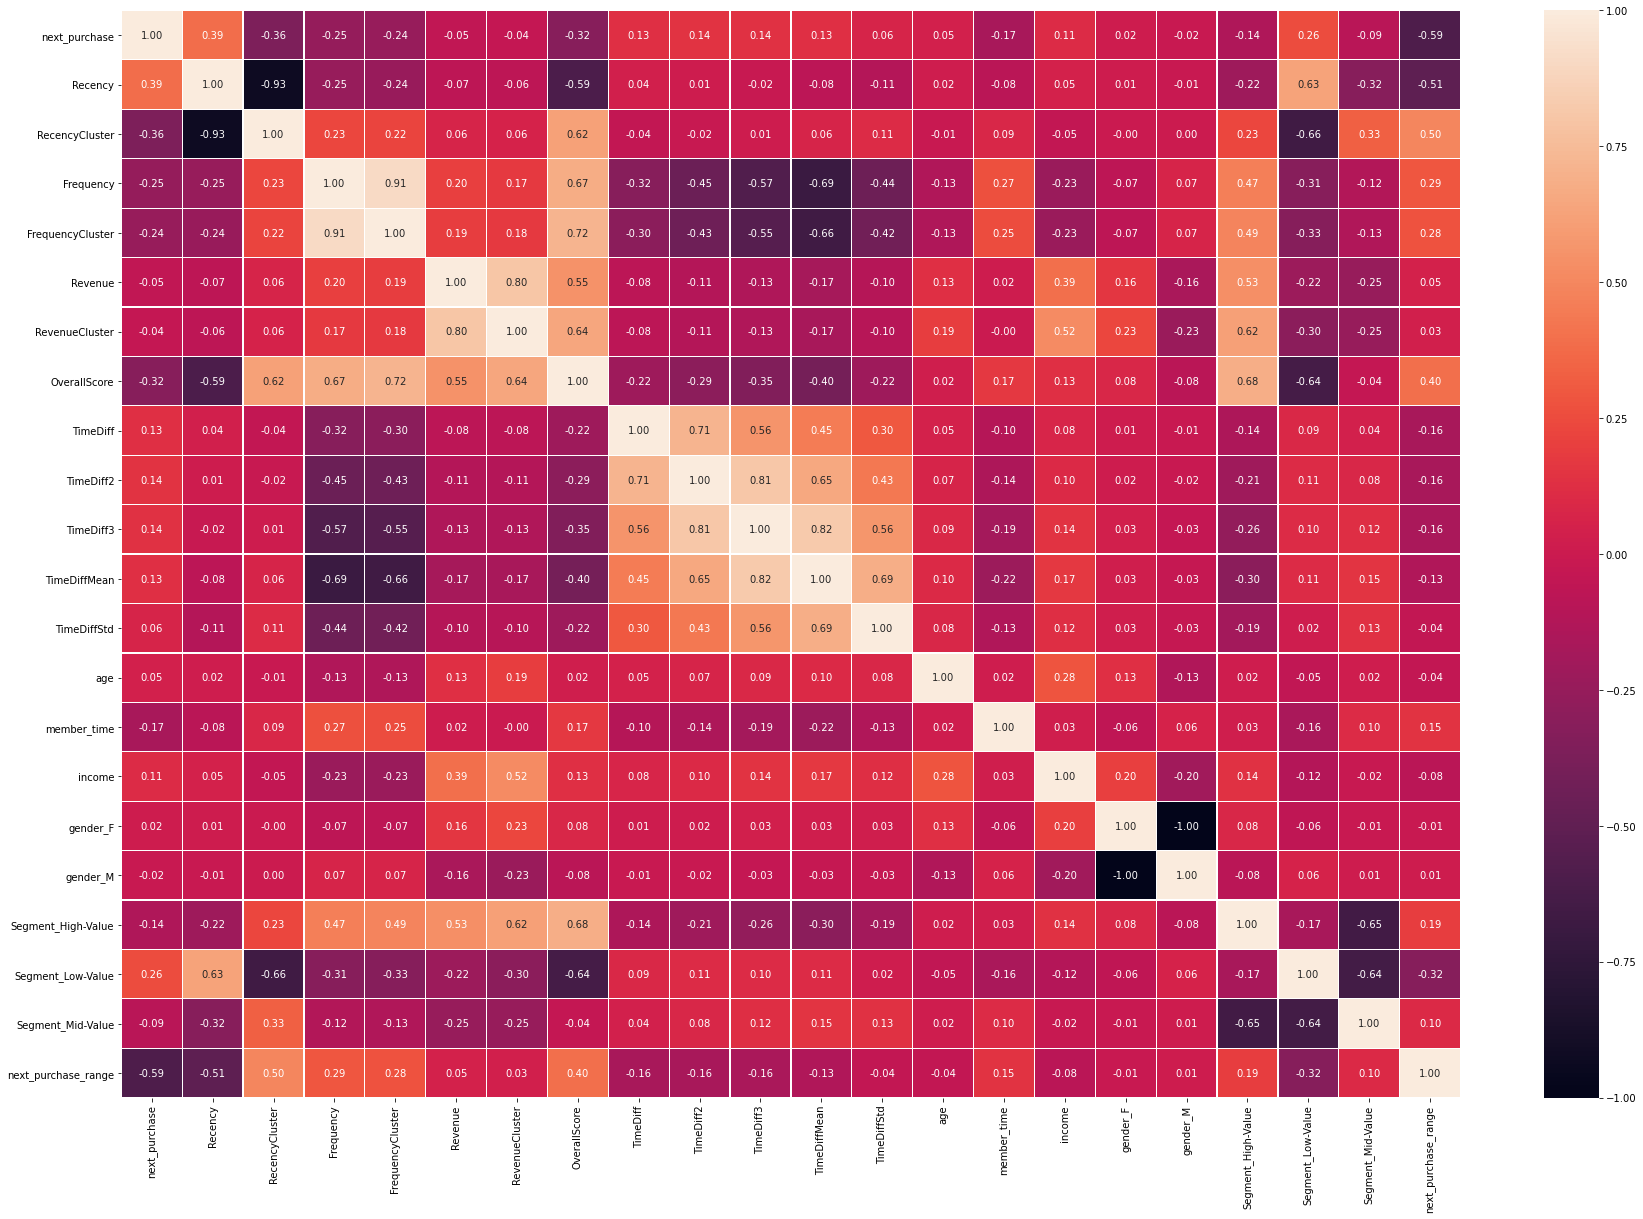

In [1537]:
corr = sb_class[sb_class.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

The three most notable correlations with next_purchase_range are next_purchase (-.59) and Recency (-.51). Those negative correlations make sense since the lower next_purchase and Recency are, the better. RecencyCluster shows a positive correlation of .5 while OverallScore shows a .4 correlation.

# Next steps
Scaling data and creating a simple model as a baseline for more sophisticated models.

In [1538]:
sb_class.to_csv(r'C:\Users\Owner\Springboard\Starbucks_Capstone\sb_class.csv')